<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/Plotting%20Stories%20to%20Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.oreilly.com/learning/perform-sentiment-analysis-with-lstms-using-tensorflow

https://nbviewer.jupyter.org/github/IndicoDataSolutions/plotlines/blob/master/plotlines.ipynb

## Imports

In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn 
seaborn.set_style("darkgrid")

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def nltk_sentiment(sentence):    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
doc = "Rafiki puts the juice and sand he collects on Simba's brow a ceremonial crown. He then picks Simba up and ascends to the point of Pride Rock. Mufasa and Sarabi follow. With a crescendo in the music and a restatement of the refrain, Rafiki holds Simba up for the crowd to view."

In [ ]:
nltk_sentiment(doc)

{'compound': 0.9961, 'neg': 0.072, 'neu': 0.787, 'pos': 0.141}

In [ ]:
!pip install textblob
from textblob import TextBlob

def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity

In [ ]:
get_textBlob_score(doc)

0.05

### wiki extract plot

In [ ]:
!pip install wikipedia
import wikipedia

  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
doc = wikipedia.page("Cinderella (2015 Disney film)").section('Plot')

### Word Cloud

In [ ]:
doc2 = '''The Clever Gentleman Sir Quixote of La Mancha (Modern Spanish: El Ingenioso Hidalgo Don Quijote de La Mancha, pronounced [el iŋxeˈnjoso iˈðalɣo ðoŋ kiˈxote ðe la ˈmantʃa]), or just Don Quixote (/ˌdɒn kiːˈhoʊti/, US: /-teɪ/,[1] Spanish: [doŋ kiˈxote] (About this soundlisten)), is a Spanish novel by Miguel de Cervantes. Published in two parts, in 1605 and 1615, Don Quixote is the most influential work of literature from the Spanish Golden Age and the entire Spanish literary canon. A founding work of Western literature, it is often labeled "the first modern novel"[2] and is sometimes considered the best literary work ever written.[3][4] The plot revolves around the adventures of a noble (hidalgo) from La Mancha named Alonso Quixano, who reads so many chivalric romances that he loses his mind and decides to become a knight-errant (caballero andante) to revive chivalry and serve his nation, under the name Don Quixote de la Mancha. He recruits a simple farmer, Sancho Panza, as his squire, who often employs a unique, earthy wit in dealing with Don Quixote's rhetorical monologues on knighthood, already considered old-fashioned at the time. Don Quixote, in the first part of the book, does not see the world for what it is and prefers to imagine that he is living out a knightly story. Throughout the novel, Cervantes uses such literary techniques as realism, metatheatre, and intertextuality. The book had a major influence on the literary community, as evidenced by direct references in Alexandre Dumas' The Three Musketeers (1844), Mark Twain's Adventures of Huckleberry Finn (1884), and Edmond Rostand's Cyrano de Bergerac (1897), as well as the word quixotic and the epithet Lothario; the latter refers to a character in "El curioso impertinente" ("The Impertinently Curious Man"), an intercalated story that appears in Part One, chapters 33–35. The 19th-century German philosopher Arthur Schopenhauer cited Don Quixote as one of the four greatest novels ever written, along with Tristram Shandy, La Nouvelle Héloïse, and Wilhelm Meisters Lehrjahre.[5] When first published, Don Quixote was usually interpreted as a comic novel. After the French Revolution, it was better known for its central ethic that individuals can be right while society is quite wrong and seen as disenchanting. In the 19th century, it was seen as a social commentary, but no one could easily tell "whose side Cervantes was on". Many critics came to view the work as a tragedy in which Don Quixote's idealism and nobility are viewed by the post-chivalric world as insane, and are defeated and rendered useless by common reality. By the 20th century, the novel had come to occupy a canonical space as one of the foundations of modern literature.'''

In [ ]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

doc2 = REPLACE_NO_SPACE.sub("", doc2.lower())
doc2 = REPLACE_WITH_SPACE.sub(" ", doc2)

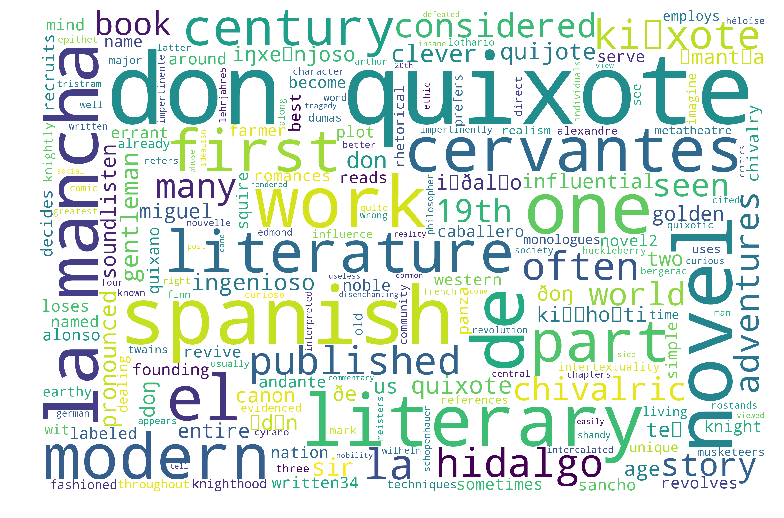

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2000
                     ).generate(doc2)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Helper Functions

Sliding window instead of regular slices

Change the sampling strategy (currently whitespace split)

In [ ]:
def sample_window(seq, window_size = 10, stride = 1):  
    for pos in range(0, len(seq), stride):
        yield seq[pos : pos + window_size]

In [ ]:
def merge(seq, stride = 4):
    for pos in range(0, len(seq), stride):
        yield seq[pos : pos + stride] 

## iNDICO

In [ ]:
!pip install indicoio

     |████████████████████████████████| 143kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/a5/44/8e/f71811a30f307556c00c411e1596b6294d7d92109361a151f8
  Stored in directory: /root/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built indicoio msgpack-python


In [ ]:
# indico API
import indicoio  # https://pypi.python.org/pypi/IndicoIo; install using `pip install -U indicoio`

In [ ]:
indicoio.config.api_key = '38e68452db2cf517e7ebaf24c2b476d2'

In [ ]:
score = indicoio.sentiment(doc)
print(score)

0.7735788628299651


In [ ]:
d = {}

# Parse text
words = [s for s in doc.split()]  # simplest tokenization method

merged_words = [" ".join(w) for w in merge(words, 5)]

# Sample a sliding window of context
samples = [" ".join(s) for s in sample_window(merged_words, 3, 1)] 
pp.pprint(samples)  # comment this line out for big input!
d['samples'] = samples

# Score sentiment using indico API
print("\n  Submitting %i samples..." % (len(samples)))
scores = indicoio.sentiment(samples)
d['scores'] = scores
print("  ...done!")

[   "Rafiki puts the juice and sand he collects on Simba's brow---a ceremonial "
    'crown. He then',
    "sand he collects on Simba's brow---a ceremonial crown. He then picks "
    'Simba up and ascends',
    'brow---a ceremonial crown. He then picks Simba up and ascends to the '
    'point of Pride',
    'picks Simba up and ascends to the point of Pride Rock. Mufasa and Sarabi '
    'follow.',
    'to the point of Pride Rock. Mufasa and Sarabi follow. With a crescendo in '
    'the',
    'Rock. Mufasa and Sarabi follow. With a crescendo in the music and a '
    'restatement of',
    'With a crescendo in the music and a restatement of the refrain, Rafiki '
    'holds Simba',
    'music and a restatement of the refrain, Rafiki holds Simba up for the '
    'crowd to',
    'the refrain, Rafiki holds Simba up for the crowd to view.',
    'up for the crowd to view.',
    'view.']

  Submitting 11 samples...
  ...done!


/usr/local/lib/python3.6/dist-packages/indicoio/utils/api.py:147: UserWarning: You're out of credits for the month! You're running into your grace credits now.
  warnings.warn(warning)


,samples,scores
0,Rafiki puts the juice and sand he collects on ...,0.716651
1,sand he collects on Simba's brow---a ceremonia...,0.451806
2,brow---a ceremonial crown. He then picks Simba...,0.211606
3,picks Simba up and ascends to the point of Pri...,0.156922
4,to the point of Pride Rock. Mufasa and Sarabi ...,0.317079
5,Rock. Mufasa and Sarabi follow. With a crescen...,0.561463
6,With a crescendo in the music and a restatemen...,0.913848
7,"music and a restatement of the refrain, Rafiki...",0.949742
8,"the refrain, Rafiki holds Simba up for the cro...",0.934285
9,up for the crowd to view.,0.770297


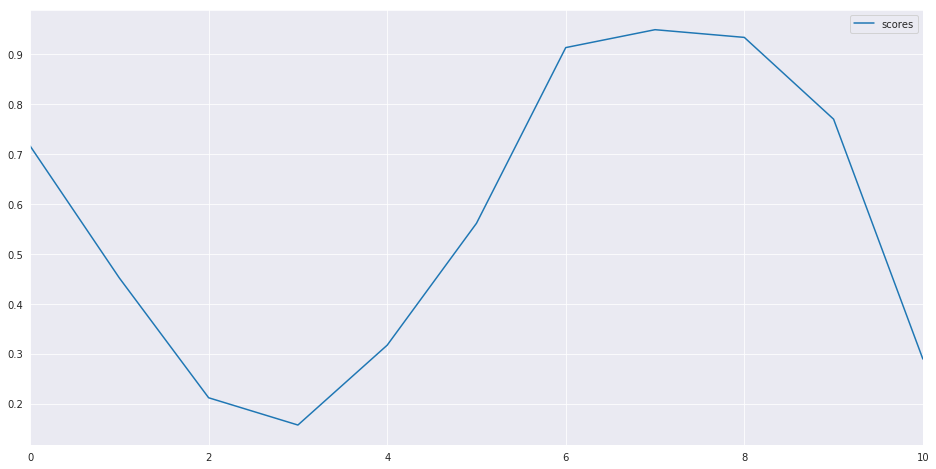

In [ ]:
df = pd.DataFrame()
for k,v in d.items():  
    df[k] = pd.Series(v)  # keys -> columns, values -> rows
df.plot(figsize = (16,8))
df  # display the table of values

## VADER

In [ ]:
d = {}

# Parse text
words = [s for s in doc.split()]  # simplest tokenization method

merged_words = [" ".join(w) for w in merge(words, 5)]
scores = []
# Sample a sliding window of context
samples = [" ".join(s) for s in sample_window(merged_words, 3, 1)] 
# pp.pprint(samples)  # comment this line out for big input!
d['samples'] = samples

# Score sentiment using indico API
print("\n  Submitting %i samples..." % (len(samples)))
for s in samples:
  scores.append(nltk_sentiment(s)['compound'])
d['scores'] = scores
print("  ...done!")


  Submitting 141 samples...
  ...done!


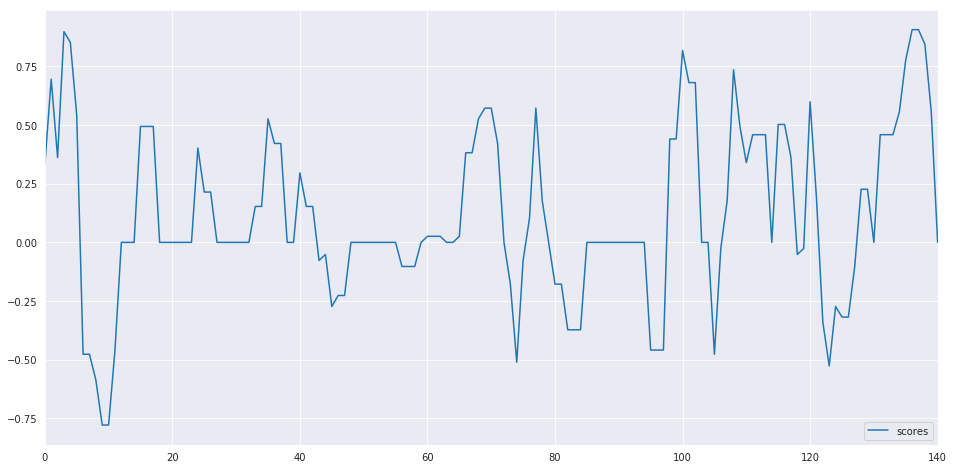

In [ ]:
df = pd.DataFrame()
for k,v in d.items():  
    df[k] = pd.Series(v)  # keys -> columns, values -> rows
df.plot(figsize = (16,8))
#df  # display the table of values